In [ ]:
import pandas as pd
import random

# ---------------------------
# ✅ GENERATE BALANCED DATA
# ---------------------------

states = ['TN', 'MH', 'KA', 'GJ', 'UP', 'RJ', 'PB', 'WB', 'KL', 'AP']
area_types = ['Urban', 'Rural']
house_types = ['1BHK', '2BHK', '3BHK']
reuse_options = ['Toilet', 'Gardening', 'Both']

data = []

# 100 reuse households (class 1)
for _ in range(100):
    state = random.choice(states)
    area = random.choice(area_types)
    house_type = random.choice(house_types)
    occupants = random.randint(2, 8)
    lpcd = random.randint(40, 90) if area == 'Rural' else random.randint(90, 135)
    greywater_lpd = round(occupants * lpcd * 0.64 * random.uniform(0.9, 1.1), 2)
    reuse = random.choice(reuse_options)
    system_installed = random.choices(['Yes', 'No'], weights=[3, 7])[0]

    if system_installed == 'Yes':
        system_cost = random.randint(5000, 20000)
        monthly_saving = round(occupants * random.uniform(10, 25), 2)
        payback = round(system_cost / monthly_saving, 1) if monthly_saving > 0 else 0
    else:
        system_cost = 0
        monthly_saving = 0
        payback = 0

    data.append([state, area, house_type, occupants, lpcd, greywater_lpd, reuse,
                 system_installed, system_cost, monthly_saving, payback])

# 30 non-reuse households (class 0)
for _ in range(30):
    state = random.choice(states)
    area = random.choice(area_types)
    house_type = random.choice(house_types)
    occupants = random.randint(2, 6)
    lpcd = random.randint(40, 90) if area == 'Rural' else random.randint(90, 135)
    greywater_lpd = round(occupants * lpcd * 0.64 * random.uniform(0.9, 1.1), 2)
    reuse = 'None'
    system_installed = 'No'
    system_cost = 0
    monthly_saving = 0
    payback = 0

    data.append([state, area, house_type, occupants, lpcd, greywater_lpd, reuse,
                 system_installed, system_cost, monthly_saving, payback])

# Create DataFrame
columns = ['State', 'Area_Type', 'Household_Type', 'Occupants', 'Water_Supply_LPCD',
           'Greywater_Generation_LPD', 'Reuse_Option', 'System_Installed',
           'System_Cost_Rs', 'Monthly_Saving_Rs', 'Payback_Months']

df = pd.DataFrame(data, columns=columns)
df['Reuse_Binary'] = df['Reuse_Option'].apply(lambda x: 0 if x == 'None' else 1)

# Save CSV
csv_path = "/content/greywater_balanced_dataset.csv" # Changed path to /content/
df.to_csv(csv_path, index=False)
csv_path

'/content/greywater_balanced_dataset.csv'

In [ ]:
import pandas as pd

df = pd.read_csv('/content/greywater_balanced_dataset.csv')
df.head()

,State,Area_Type,Household_Type,Occupants,Water_Supply_LPCD,Greywater_Generation_LPD,Reuse_Option,System_Installed,System_Cost_Rs,Monthly_Saving_Rs,Payback_Months,Reuse_Binary
0,MH,Rural,1BHK,6,63,218.34,Both,No,0,0.00,0.0,1
1,TN,Rural,1BHK,3,48,95.95,Gardening,Yes,7214,52.80,136.6,1
2,RJ,Rural,2BHK,7,47,197.45,Gardening,No,0,0.00,0.0,1
3,KL,Rural,2BHK,5,71,242.70,Gardening,No,0,0.00,0.0,1
4,KL,Rural,3BHK,8,89,447.24,Both,Yes,12491,120.52,103.6,1


<Axes: title={'center': 'Class Balance (Reuse vs No Reuse)'}, xlabel='Reuse_Binary'>

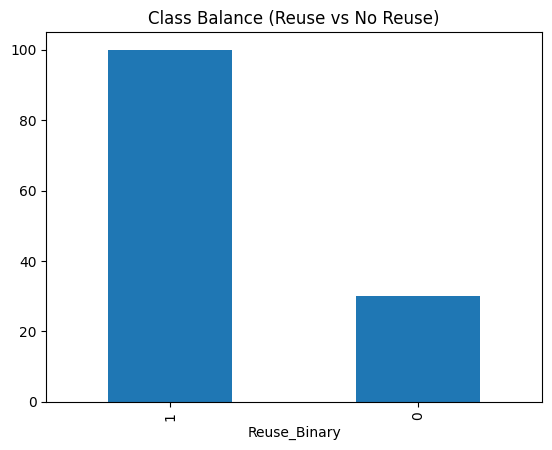

In [ ]:
df['Reuse_Binary'].value_counts().plot(kind='bar', title='Class Balance (Reuse vs No Reuse)')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Encode categoricals
df_encoded = pd.get_dummies(df[['State', 'Area_Type', 'Household_Type', 'System_Installed']], drop_first=True)

# Add numeric columns
X = pd.concat([df_encoded, df[['Occupants', 'Water_Supply_LPCD']]], axis=1)
y_class = df['Reuse_Binary']
y_reg = df['Greywater_Generation_LPD']

# Split for classification
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_class, test_size=0.2, stratify=y_class, random_state=42)

# Split for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_cls, y_train_cls)
y_pred_cls = clf.predict(X_test_cls)

print(confusion_matrix(y_test_cls, y_pred_cls))
print(classification_report(y_test_cls, y_pred_cls))


[[ 1  5]
 [ 1 19]]
              precision    recall  f1-score   support

           0       0.50      0.17      0.25         6
           1       0.79      0.95      0.86        20

    accuracy                           0.77        26
   macro avg       0.65      0.56      0.56        26
weighted avg       0.72      0.77      0.72        26



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train_reg, y_train_reg)
y_pred_reg = reg.predict(X_test_reg)

mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"MSE: {mse:.2f}\\nRMSE: {rmse:.2f}\\nR² Score: {r2:.2f}")


MSE: 938.01\nRMSE: 30.63\nR² Score: 0.92


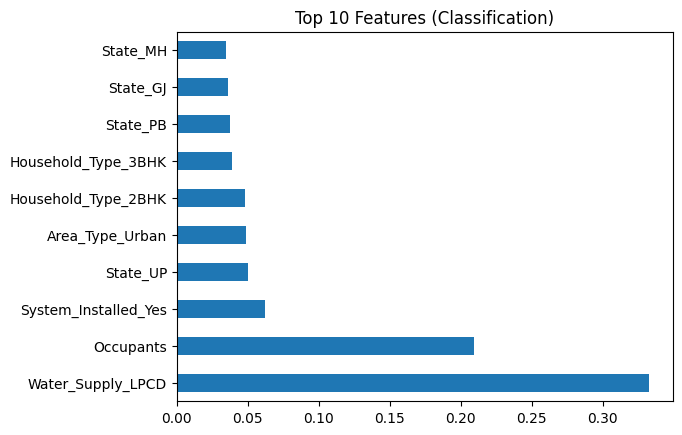

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_importance = pd.Series(clf.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Features (Classification)')
plt.show()


In [ ]:
features_2 = ['Greywater_Generation_LPD', 'System_Cost_Rs', 'Occupants'] + \
             [col for col in df_encoded.columns if 'Reuse_Option_' in col]

# Select numeric features from the original dataframe and concatenate with encoded features
X2 = pd.concat([df[['Greywater_Generation_LPD', 'System_Cost_Rs', 'Occupants']], df_encoded[[col for col in df_encoded.columns if 'Reuse_Option_' in col]]], axis=1)

y2 = df['Monthly_Saving_Rs']

reuse_flag = df['Monthly_Saving_Rs'].apply(lambda x: 1 if x > 0 else 0)

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, stratify=reuse_flag, random_state=42
)

reg2 = RandomForestRegressor(random_state=42)
reg2.fit(X2_train, y2_train)
y2_pred = reg2.predict(X2_test)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse2 = mean_squared_error(y2_test, y2_pred)
rmse2 = np.sqrt(mse2) # Calculate RMSE for the second model as well
r2_2 = r2_score(y2_test, y2_pred)

print(f"📉 Economic Model:\\nMSE: {mse2:.2f}, RMSE: {rmse2:.2f}, R²: {r2_2:.2f}")

📉 Economic Model:\nMSE: 68.33, RMSE: 8.27, R²: 0.87


In [ ]:
# Actual vs predicted (Greywater)
print("Actual vs Predicted - Greywater Volume:")
for actual, pred in zip(y_test_reg[:5], y_pred_reg[:5]):
    print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}")

# Actual vs predicted (₹ Saving)
print("\nActual vs Predicted - Monthly Saving:")
for actual, pred in zip(y2_test[:5], y2_pred[:5]):
    print(f"Actual: ₹{actual:.2f}, Predicted: ₹{pred:.2f}")


Actual vs Predicted - Greywater Volume:
Actual: 417.85, Predicted: 370.43
Actual: 302.53, Predicted: 245.97
Actual: 372.46, Predicted: 340.49
Actual: 475.26, Predicted: 405.71
Actual: 163.35, Predicted: 131.00

Actual vs Predicted - Monthly Saving:
Actual: ₹0.00, Predicted: ₹0.00
Actual: ₹0.00, Predicted: ₹0.00
Actual: ₹33.69, Predicted: ₹53.18
Actual: ₹0.00, Predicted: ₹0.00
Actual: ₹0.00, Predicted: ₹0.00


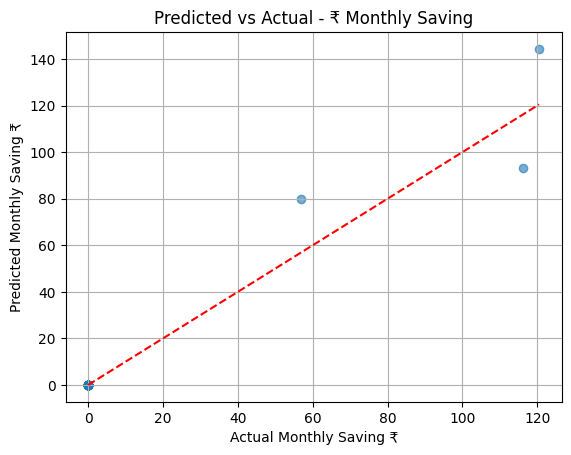

In [ ]:
# Scatter plot for monthly saving prediction
import matplotlib.pyplot as plt

plt.scatter(y2_test, y2_pred, alpha=0.6)
plt.xlabel("Actual Monthly Saving ₹")
plt.ylabel("Predicted Monthly Saving ₹")
plt.title("Predicted vs Actual - ₹ Monthly Saving")
plt.plot([0, max(y2_test)], [0, max(y2_test)], 'r--')  # perfect prediction line
plt.grid(True)
plt.show()


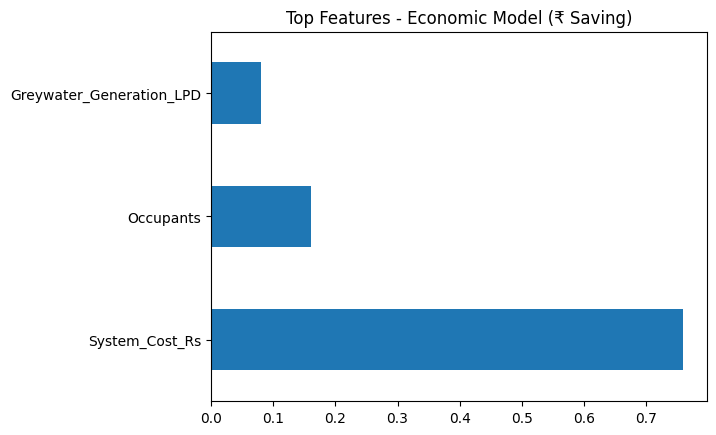

In [ ]:
feat_imp_reg2 = pd.Series(reg2.feature_importances_, index=X2.columns)
feat_imp_reg2.nlargest(7).plot(kind='barh')
plt.title("Top Features - Economic Model (₹ Saving)")
plt.show()


In [64]:
# Re-run after kernel reset
import pandas as pd
import numpy as np

# Simulate BOD dataset (based on the IJETT paper structure)
np.random.seed(42)
n_samples = 150

temperature = np.random.uniform(20, 35, n_samples)
pH = np.random.uniform(6.5, 8.5, n_samples)
TSS = np.random.uniform(50, 300, n_samples)
TS = TSS + np.random.uniform(100, 300, n_samples)
COD = np.random.uniform(100, 500, n_samples)
BOD = 0.1 * TSS + 0.05 * COD + np.random.normal(0, 5, n_samples)

df_bod = pd.DataFrame({
    'Temperature': temperature,
    'pH': pH,
    'TSS': TSS,
    'TS': TS,
    'COD': COD,
    'BOD': BOD
})

# Save to CSV
# Save CSV to current folder
bod_csv_path = "greywater_bod_dataset.csv"
df_bod.to_csv(bod_csv_path, index=False)
print(f"✅ Saved to: {bod_csv_path}")



✅ Saved to: greywater_bod_dataset.csv


In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load your dataset
df = pd.read_csv("greywater_bod_dataset.csv")

# Features and target
X = df[['Temperature', 'pH', 'TSS', 'TS', 'COD']]
y = df['BOD']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the inputs
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build ANN model
model = Sequential()
model.add(Dense(16, input_dim=5, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))  # Output layer (regression)

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=8, verbose=0)

# Predict
y_pred = model.predict(X_test_scaled).flatten()

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"📉 ANN Regression Metrics:")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
📉 ANN Regression Metrics:
MSE  : 42.71
RMSE : 6.53
R²   : 0.79


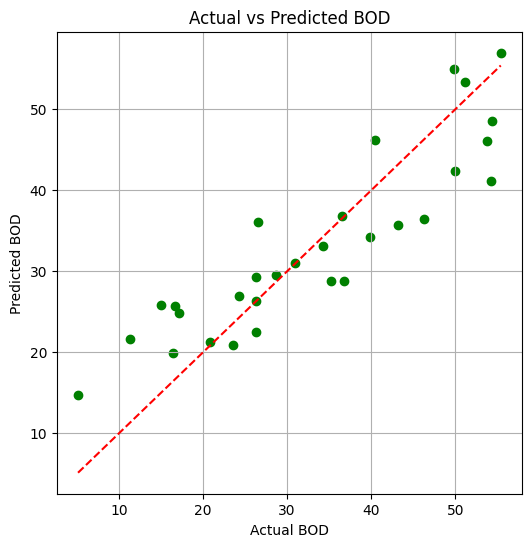

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, c='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual BOD")
plt.ylabel("Predicted BOD")
plt.title("Actual vs Predicted BOD")
plt.grid(True)
plt.show()


In [67]:
!pip install xgboost

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Reuse scaled data from earlier
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "SVR": SVR()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"🔹 {name} Results:")
    print(f"   MSE  : {mse:.2f}")
    print(f"   RMSE : {rmse:.2f}")
    print(f"   R²   : {r2:.2f}\n")



🔹 Random Forest Results:
   MSE  : 40.85
   RMSE : 6.39
   R²   : 0.80

🔹 XGBoost Results:
   MSE  : 49.36
   RMSE : 7.03
   R²   : 0.75

🔹 SVR Results:
   MSE  : 104.38
   RMSE : 10.22
   R²   : 0.48



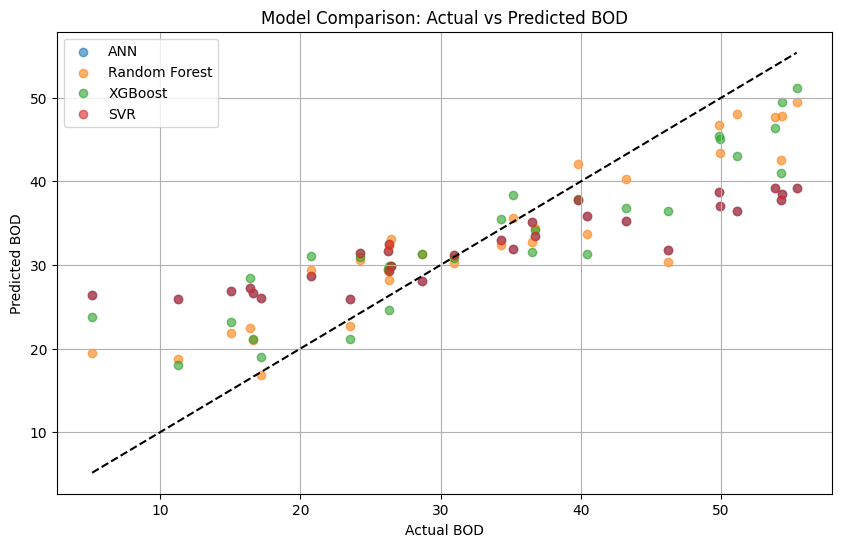

In [70]:
import matplotlib.pyplot as plt

y_preds = {
    "Actual": y_test.values,
    "ANN": y_pred,  # replace with ANN prediction if rerun
}

for name, model in models.items():
    y_preds[name] = model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
for name, preds in y_preds.items():
    if name != "Actual":
        plt.scatter(y_preds["Actual"], preds, label=name, alpha=0.6)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Actual BOD")
plt.ylabel("Predicted BOD")
plt.title("Model Comparison: Actual vs Predicted BOD")
plt.legend()
plt.grid(True)
plt.show()


In [71]:
import pandas as pd

# Create dictionary of model results
results = {
    'Model': ['ANN (Keras)', 'Random Forest', 'XGBoost', 'SVR'],
    'MSE': [42.71, 40.85, 49.36, 104.38],
    'RMSE': [6.53, 6.39, 7.03, 10.22],
    'R² Score': [0.79, 0.80, 0.75, 0.48]
}

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Highlight best R² score
def highlight_best_r2(val):
    return 'background-color: lightgreen' if val == results_df['R² Score'].max() else ''

# Show the styled table
results_df.style.applymap(highlight_best_r2, subset=['R² Score'])


/tmp/ipython-input-1835838753.py:19: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  results_df.style.applymap(highlight_best_r2, subset=['R² Score'])


,Model,MSE,RMSE,R² Score
0,ANN (Keras),42.710000,6.530000,0.790000
1,Random Forest,40.850000,6.390000,0.800000
2,XGBoost,49.360000,7.030000,0.750000
3,SVR,104.380000,10.220000,0.480000
